# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 24: Regresión Logística.


In [1]:
#from sklearn import datasets
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 16

import numpy as np
import sklearn as sk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/Users/paguirre/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


##  1. Introducción.

Los métodos de clasificación corresponden a algortimos de aprendizaje supervisado que permiten predecir el valor de una variable categórica a partir de un conjunto de variables predictoras, que a su vez pueden ser numéricas o categóricas.

Cuando la variable de salida es binaria, podemos aplicar el modelo de regresión logística. En el caso que la variable dependiente tenga 3 o más valores posibles, es de utilidad el método de clasificación kNN (que también se puede aplicar al caso binario).



##  2. Regresión Logística

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al ajustar una recta mediante regresión lineal, se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo (0,1), ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la regresión logística  transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide). Aplicando esta transformación, la función de probabilidad $P(Y=1)$ queda expresada como:

\begin{equation}
\ln \left( \frac{P(Y=1)}{1-P(Y=1)}\right)=\beta_0+\beta_1 X
\end{equation}


\begin{equation}
   \rightarrow P(Y=1)=p= \frac{1}{1+e^{-(\beta_0+\beta_1 X)}}
\end{equation}

Para ajustar el modelo logístico que permite predecir $P(Y=1)$, es necesario entonces encontrar los valores de los parámetros $\beta_0$ y $\beta_1$, a partir de los valores observados de $p$. 



En este ejemplo, usaremos un dataset de RRSS para predecir si una persona realiza o no una compra luego de hacer clikc en un aviso publicitario en la red. Para ello, se requiere crear un clasificador que clasifique a cada usuario en la categoría correcta en base a sus características: compra o no compra.

Como predictores, utilizaremos la edad y salario estimado del usuario.

In [5]:
df=pd.read_csv('Social_Network_Ads.csv')
df['EstimatedSalary']=df['EstimatedSalary']/1000
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19.0,0
1,15810944,Male,35,20.0,0
2,15668575,Female,26,43.0,0
3,15603246,Female,27,57.0,0
4,15804002,Male,19,76.0,0


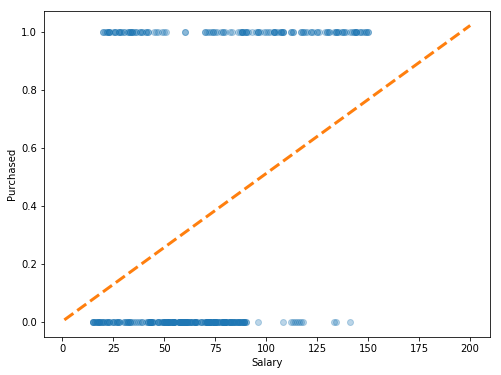

In [9]:
from sklearn.linear_model import LinearRegression
fig=plt.figure(figsize=(8,6))

# Create linear regression object
regr = LinearRegression()
regr.fit(df['EstimatedSalary'].values.reshape(-1,1),df['Purchased'])
x_model=np.linspace(1,200,100)
model=regr.predict(x_model.reshape(-1,1))
# Train the model using the training sets

# Make predictions using the testing set
ax=fig.add_subplot(111)
ax.plot(df['EstimatedSalary'],df['Purchased'],'o',alpha=0.3)
ax.plot(x_model,model,'--',lw=3)
ax.set_xlabel('Salary');
ax.set_ylabel('Purchased');
fig.savefig('logreg.png',dpi=300,bbox_inches='tight')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Creamos los datos de entrenamiento y prueba

X=df['EstimatedSalary']
y=df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train= X_train.values.reshape(-1,1)
X_test= X_test.values.reshape(-1,1)

#definimos el regresor logístico
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

#parametros del modelo logístico
print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[0.02069551]]
Estimated beta0: 
 [-1.99149521]


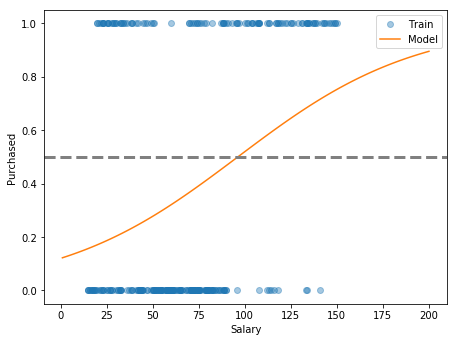

In [14]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

#vector de valores de x
x_model=np.linspace(1,200,100).reshape(-1, 1)

#predictor de P(Y=1|x) (función de probabilidad)
ypred_model = logreg.predict_proba(x_model)[:,1] 

plt.plot(X_train, y_train, 'o' ,alpha=0.4, label='Train')
#plt.plot(X_test, y_test, 'o' ,color='orange',alpha=0.4, label='Test')

plt.plot(x_model,ypred_model, label='Model')
plt.legend()
plt.axhline(y=0.5,ls='--',lw=3,c='gray')
plt.xlabel("Salary")
plt.ylabel("Purchased");
fig.savefig('logreg2.png',dpi=300,bbox_inches='tight')

#### ¿Cuál es la probabilidad de compra para alguien con un salario estimado de \$75.000? 

De acuerdo al modelo logístico, la probabilidad de $Y=1$ (en este caso, `Purchased`=1)está dada por:

\begin{equation}
     P(Y=1)= \frac{1}{1+e^{-(\beta_0+\beta_1 X)}}
\end{equation}

Para un valor cualquiera de $X$ (`EstimatedSalary`), podemos calcular esta probabilidad "manualmente" usando los valores obtenidos para $\beta_0$ y $\beta_1$, o usar el método `predict_proba`:

In [15]:
#cálculo manual
b1=logreg.coef_
b0=logreg.intercept_
x=75
prob=1/(1+np.exp(-(b0+b1*x)))
print('P(Y=1|x=75)=',prob)


P(Y=1|x=75)= [[0.3919001]]


In [116]:
#cálculo usando función predict
x=np.array([75]).reshape(-1,1)
prob=logreg.predict_proba(x)
print('P(Y=1|x=75)=',prob[0][1])


P(Y=1|x=75)= 0.3919000969833739


### Usando el modelo de regresión logística para clasificar.

¿Cómo podemos usar la regresión logística para hacer una clasificación? Es decir, ¿cómo podemos predecir si $Y=1$ o $Y=0$· para una nueva observación?

Podemos clasificar las observaciones en base a su probabilidad: asociamos todas las observaciones con $P(Y=1)\geq 0.5$ a la categoría `Purchased=1`, y todas las observaciones con $P(Y=1)<0.5$ al grupo `Purchased=0`.

Este enfoque corresponde al clasificador de Bayes estándar: se asocia cada observación a la clase más probable, dado el valor de sus predictores.

El método `predict` de `LogisticRegression`permite hacer esta clasificación en forma automática para nuevos valores de $X$.

In [16]:
#predecimos la probabilidad y categoría para el dataset de entrenamiento

#probabilidad de Y=1 para cada dato de prueba
pred_test=logreg.predict_proba(X_test)[:,1]

#clase predicha para cada dato de prueba (1/0)
y_pred_test=logreg.predict(X_test) 

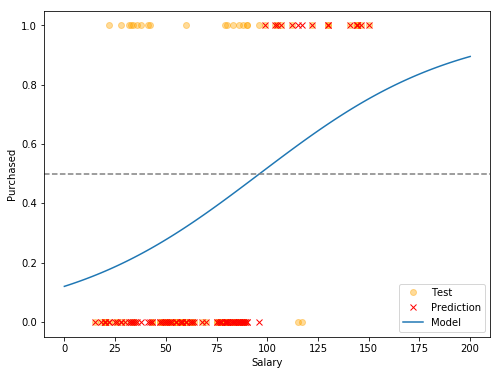

In [19]:
fig = plt.figure(figsize=(8,6))

#vector de valores de x
x_model=np.linspace(0,200,100).reshape(-1, 1)

#predictor de P(Y=1|x) (función de probabilidad)
ypred_model = logreg.predict_proba(x_model)[:,1] 

#plt.plot(X_train, y_train, 'o' ,alpha=0.4, label='Train')
plt.plot(X_test, y_test, 'o' ,color='orange',alpha=0.4, label='Test')
plt.plot(X_test, y_pred_test, 'x' ,color='red', label='Prediction')

plt.plot(x_model,ypred_model, label='Model')
plt.legend()
plt.axhline(y=0.5,ls='--',c='gray')
plt.xlabel("Salary")
plt.ylabel("Purchased");

### ¿Qué tan buena resultó la clasificación?

Para evaluar la calidad de la clasificación, calculamos la matrix de confusión y las métricas de rendimiento considerando las predicciones y clases reales de los datos de prueba.

Estas métricas están implementadas en el módulo `sklearn.metrics`.

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        68
           1       0.88      0.44      0.58        32

   micro avg       0.80      0.80      0.80       100
   macro avg       0.83      0.70      0.73       100
weighted avg       0.81      0.80      0.78       100



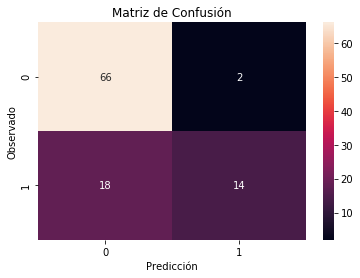

In [21]:
from sklearn import metrics
import seaborn as sns

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred
#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)

## Regresión Logística Mútiple.

La regresión logística también puede aplicarse al caso de más de un predictor. Por ejemplo, podemos preguntarnos, ¿hay una asociación entre la probabilidad de compra, la edad y el salario estimado?

Para sofisticar el modelo, podemos realizar una regresión múltiple con dos variables predictoras: `Age`y `EstimatedSalary`. En este caso, estamos ajustando una expresión de la forma:

\begin{equation}
\ln \left( \frac{P(Y=1)}{1-P(Y=1)}\right)=\beta_0+\beta_1 X_1+\beta_2 X_2
\end{equation}


Analicemos primero los datos.


In [23]:
from sklearn.linear_model import LogisticRegression

#Creamos los datos de entrenamiento y prueba

X2=df[['EstimatedSalary','Age']]
y=df['Purchased']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.25, random_state = 0)

#definimos el regresor logístico
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2);

#parametros del modelo logístico
print('beta1,beta2: \n', logreg2.coef_)
print('beta0: \n', logreg2.intercept_)

beta1,beta2: 
 [[0.01699107 0.10756811]]
beta0: 
 [-5.86973608]


In [25]:
#Prediccion del model de regresión múltiple para los datos de prueba:

y_pred_test2=logreg2.predict(X_test2) #clase predicha para cada dato de entrenamiento (1/0)
report2=metrics.classification_report(y_test2, y_pred_test2)

print('Reporte para regresión con 1 variable (Salary):')
print(report0)

print('Reporte para regresión con 2 variables (Salary,Age):')
print(report2)

Reporte para regresión con 1 variable (Salary):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        68
           1       0.88      0.44      0.58        32

   micro avg       0.80      0.80      0.80       100
   macro avg       0.83      0.70      0.73       100
weighted avg       0.81      0.80      0.78       100

Reporte para regresión con 2 variables (Salary,Age):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        68
           1       0.96      0.75      0.84        32

   micro avg       0.91      0.91      0.91       100
   macro avg       0.93      0.87      0.89       100
weighted avg       0.91      0.91      0.91       100



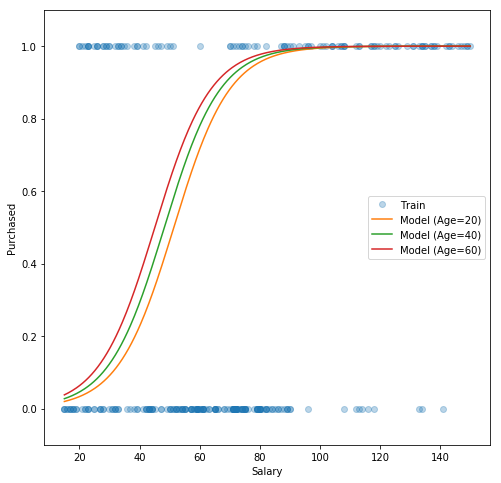

In [26]:
#Para visualizar el modelo, graficaremos en 2-D Salary vs. Purchased, para distintos valores de la variable AGE
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

#datos
plt.plot(X_train2.values[:,0],y_train2, 'o' ,alpha=0.3, label='Train')

for age in [20,40,60]:
    #definimos las matrices de variables predictoras X para cada caso
    xm1=np.ones(len(X2))*age
    xm2=np.linspace(np.min(X2['EstimatedSalary']),np.max(X2['EstimatedSalary']),len(X2))
    xage=np.array([xm1,xm2]).T
    ypred_age = logreg2.predict_proba(xage)[:,1]

    #regresion
    ax.plot(xm2,ypred_age,'-',label='Model (Age=%d)'%age)


plt.ylim((-0.1, 1.1))
plt.xlabel("Salary")
plt.ylabel("Purchased")
plt.legend();
plt.show()